# import

In [1]:
import sys
import os
from tqdm import tqdm

import torch

import matplotlib.pyplot as plt
import numpy as np

sys.path.append('../src/')
import utils
import dataloader
from train_utils import *
from model.AutoEncoder import *
from model.RDEC import RDEC

# set params

In [2]:
config = utils.readConfig('../config.json')

In [3]:
train_config = config['train_params']['train']

batch_size = train_config['batch_size']

model_config = config['model_params']
encoder_layers = model_config['encoder_layers']
decoder_layers = model_config['decoder_layers']
num_clusters = model_config['num_clusters']
base_unit_num = model_config['base_unit_num']
emb_dim = model_config['emb_dim']

output_dir = '../data/test'
utils.makeDirs(output_dir, ['graph'])

weight_path = '../data/train/weights/RDEC.pth'
enc_weight_path = '../data/pretrain/weights/Encoder.pth'
dec_weight_path = '../data/pretrain/weights/Decoder.pth'

# load dataset

In [4]:
dataloaders, classes = dataloader.load_mnist('../data', batch_size)

# def model and load weights

In [5]:
encoder = EncoderBlock(encoder_layers, base_unit_num, emb_dim)
for input_data, label in dataloaders['train']:
    break
model = RDEC(encoder, num_clusters, input_data,)
model.load_state_dict(torch.load(weight_path))

<All keys matched successfully>

In [6]:
auto_encoder = AutoEncoder(encoder_layers, decoder_layers,
                           base_unit_num, emb_dim)
auto_encoder.encoder.load_state_dict(torch.load(enc_weight_path))
auto_encoder.decoder.load_state_dict(torch.load(dec_weight_path))

<All keys matched successfully>

# load data

In [7]:
imgs_list = []
labels_list = []
for imgs, labels in dataloaders['test']:
    imgs_list.append(imgs)
    labels_list.append(labels)
imgs = torch.cat(imgs_list, 0)
labels = torch.cat(labels_list, 0)

# Auto Encoder test

In [8]:
rec_imgs = auto_encoder(imgs).detach().numpy()

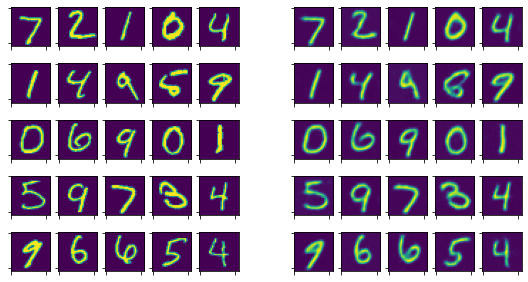

In [32]:
fig = plt.figure(figsize=(10, 5))
for idx in range(25):
    ax = fig.add_subplot(5, 12, 7*(idx//5)+1+idx)
    ax.imshow(imgs[idx, 0].numpy())
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax = fig.add_subplot(5, 12, 7*(idx//5)+7+idx)
    ax.imshow(rec_imgs[idx, 0])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
plt.savefig(f'{output_dir}/graph/rec_img.jpg', bbox_inches='tight', dpi=300)
plt.close()

# RDEC test

In [9]:
q = model(imgs)
pred = q.argmin(1)

In [10]:
fig = plt.figure(figsize=(10, num_clusters*2))
for i in range(num_clusters):
    ax = fig.add_subplot(num_clusters//2, 2, i+1)
    ax.hist([labels[pred==i]], bins=10, range=(-0.5, 9.5), ec='black')
    ax.set_xlim(-0.5, 9.5)
    ax.set_xlabel(f'cluster:{i}')
plt.savefig(f'{output_dir}/graph/hist.jpg', bbox_inches='tight', dpi=300)
plt.close()